<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW3_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 Problem 4
This code determines the minimum residence time at which the blowout occurs for a mixture of stoichiometric methane and air

Uses a perfectly stirred reactor

In [64]:
!pip install Cantera
!pip install pandas
import time
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import cantera as ct
import numpy as np

#Find residence time that results in blowout

In [129]:
gas = ct.Solution('gri30.yaml')
gas.TP = 500, 101325*10

phi = 1
FUEL = 'CH4:1'
OXID = 'O2:1, N2:3.76'
gas.set_equivalence_ratio(phi,FUEL,OXID)
gas()
#help(gas)
reactor_volume = 1.5e1  # m3

fuel_air_mixture_tank = ct.Reservoir(gas)
exhaust = ct.Reservoir(gas)

gas.equilibrate('HP')

stirred_reactor = ct.IdealGasMoleReactor(gas, energy="on", volume=reactor_volume)

mass_flow_controller = ct.MassFlowController(
    upstream=fuel_air_mixture_tank,
    downstream=stirred_reactor,
    mdot=595392.98109, # guessed value (increase until blowoff occurs)
)
print(f'mass = {stirred_reactor.mass:.4f} kg')
pressure_regulator = ct.PressureController(
    upstream=stirred_reactor,
    downstream=exhaust,
    primary=mass_flow_controller,
    K=1e-3,
)

reactor_network = ct.ReactorNet([stirred_reactor])

# Create a SolutionArray to store the data
time_history = ct.SolutionArray(gas, extra=["t"])

# Set the maximum simulation time
max_simulation_time = 50 # seconds

# Start the stopwatch
#tic = time.time()

# Set simulation start time to zero
t = 0
counter = 1
while t < max_simulation_time:
    t = reactor_network.step()

    # We will store only every 10th value. Remember, we have 1200+ species, so there
    # will be 1200+ columns for us to work with
    #if counter % 10 == 0:
        # Extract the state of the reactor
    time_history.append(stirred_reactor.thermo.state, t=t)

    #counter += 1

# Stop the stopwatch
#toc = time.time()

#print(f"Simulation Took {toc-tic:3.4f}s to compute, with {counter} steps")
print(f'mass flow rate = {mass_flow_controller.mass_flow_rate:.4f} kg/s')
print(f'residence time = {21.08384195/mass_flow_controller.mass_flow_rate*1000:.4f} ms')


  gri30:

       temperature   500 K
          pressure   1.0132e+06 Pa
           density   6.7352 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            -33317       -9.2066e+05  J
   internal energy       -1.8376e+05       -5.0779e+06  J
           entropy            7118.7        1.9671e+05  J/K
    Gibbs function       -3.5927e+06       -9.9278e+07  J
 heat capacity c_p            1140.4             31514  J/K
 heat capacity c_v            839.53             23199  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -24.438
               CH4          0.055187          0.095057           -40.936
                N2           0.72467           0.71483           -21.465


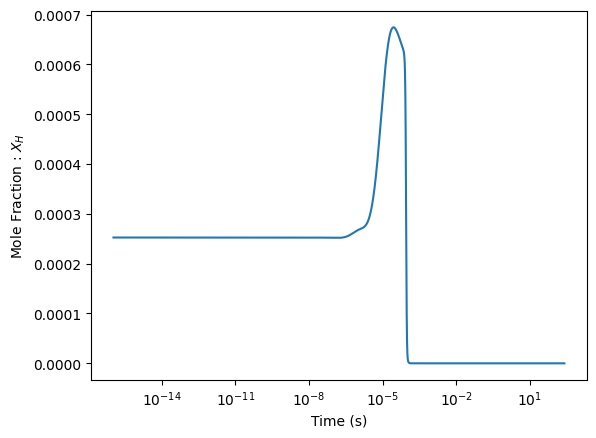

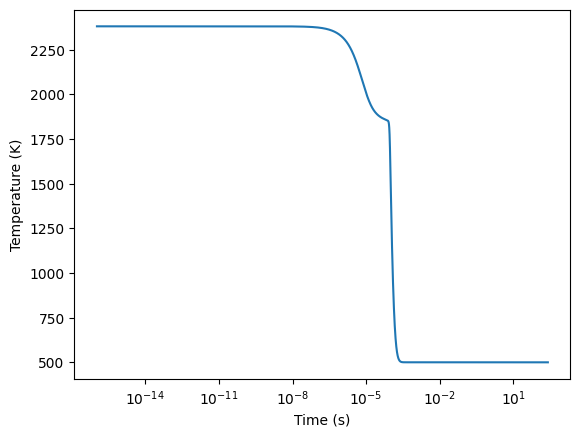

In [124]:
# plot temperature profile and 'H' radical mole fraction
plt.figure()
plt.semilogx(time_history.t, time_history("H").X, "-")
plt.xlabel("Time (s)")
plt.ylabel("Mole Fraction : $X_{H}$")
plt.show()

plt.figure()
plt.semilogx(time_history.t,time_history.T)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.show()

# Find flammability limits for doubled residence time from above

ϕ = 0.50
mass = 31.4865 kg
mass flow rate = 444580.6192 kg/s
residence time = 0.0708 ms
ϕ = 0.60
mass = 28.2337 kg
mass flow rate = 398650.8942 kg/s
residence time = 0.0708 ms
ϕ = 0.70
mass = 25.7240 kg
mass flow rate = 363215.5604 kg/s
residence time = 0.0708 ms
ϕ = 0.80
mass = 23.7400 kg
mass flow rate = 335201.4749 kg/s
residence time = 0.0708 ms
ϕ = 0.90
mass = 22.1711 kg
mass flow rate = 313049.8765 kg/s
residence time = 0.0708 ms
ϕ = 1.00
mass = 21.0838 kg
mass flow rate = 297697.6682 kg/s
residence time = 0.0708 ms
ϕ = 1.10
mass = 20.9075 kg
mass flow rate = 295207.1968 kg/s
residence time = 0.0708 ms
ϕ = 1.20
mass = 21.1616 kg
mass flow rate = 298794.9220 kg/s
residence time = 0.0708 ms
ϕ = 1.30
mass = 21.4796 kg
mass flow rate = 303286.1885 kg/s
residence time = 0.0708 ms
ϕ = 1.40
mass = 21.8213 kg
mass flow rate = 308110.1411 kg/s
residence time = 0.0708 ms
ϕ = 1.50
mass = 22.1815 kg
mass flow rate = 313195.8357 kg/s
residence time = 0.0708 ms
ϕ = 1.60
mass = 22.5606 kg
mass 

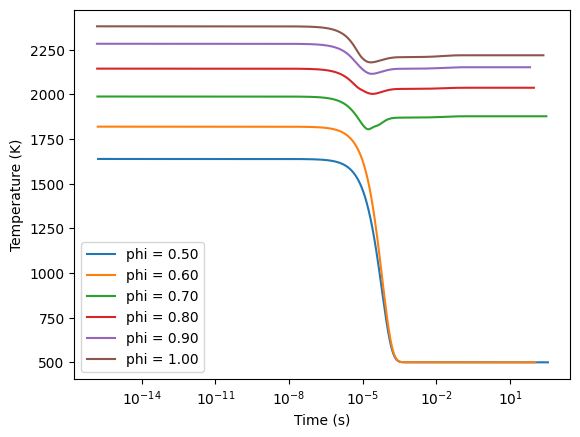

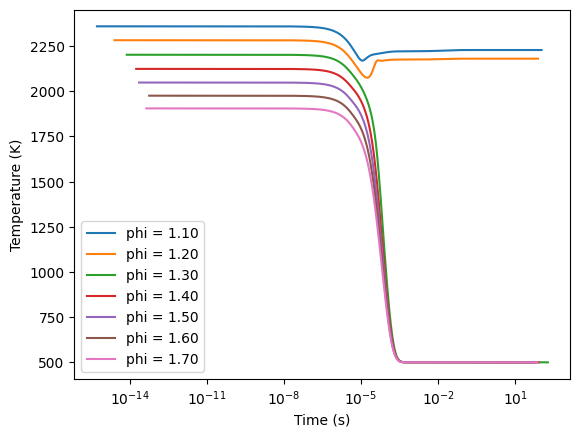

In [134]:
gas = ct.Solution('gri30.yaml')
gas.TP = 500, 101325*10
#residence_time = 3.3936e-4  # s
#residence_time = 3.3936e-4/2  # s
residence_time = 7.0823e-5  # s
#residence_time = 3.541156962e-5  # s
reactor_volume = 1.5e1  # m3

phi = np.arange(.5,1.8,.1) # .5->1.7
FUEL = 'CH4:1'
OXID = 'O2:1, N2:3.76'
phi_dependence = ct.SolutionArray(gas)
for phi_dependence in phi:
  gas = ct.Solution('gri30.yaml')
  gas.TP = 500, 101325*10
  FUEL = 'CH4:1'
  OXID = 'O2:1, N2:3.76'
  gas.set_equivalence_ratio(phi_dependence,FUEL,OXID)

  #residence_time = 3.3936e-4       # double res time when m = 101 and mdot = 595392
  #residence_time = 3.3936e-4/2     # when m = 101 and mdot = 595392
  residence_time = 7.0823e-5        # double res time when m=21.0838 and mdot=595392
  #residence_time = 3.541156962e-5  # when m = 21.0838 and mdot = 595392

  reactor_volume = 1.5e1  # m3

  fuel_air_mixture_tank = ct.Reservoir(gas)

  gas.equilibrate("HP")

  stirred_reactor = ct.IdealGasMoleReactor(gas, energy="on", volume=reactor_volume)

  print(f'\u03d5 = {phi_dependence:.2f}')
  print(f'mass = {stirred_reactor.mass:.4f} kg')

  exhaust = ct.Reservoir(gas)

  mass_flow_controller = ct.MassFlowController(
      upstream=fuel_air_mixture_tank,
      downstream=stirred_reactor,
      mdot=stirred_reactor.mass / residence_time,
  )

  pressure_regulator = ct.PressureController(
      upstream=stirred_reactor,
      downstream=exhaust,
      primary=mass_flow_controller,
      K=1e-3,
  )

  reactor_network = ct.ReactorNet([stirred_reactor])

  # Create a SolutionArray to store the data
  time_history = ct.SolutionArray(gas, extra=["t"])

  # Set the maximum simulation time
  max_simulation_time = 50  # seconds

  # Set simulation start time to zero
  t = 0
  while t < max_simulation_time:
      t = reactor_network.step()
      time_history.append(stirred_reactor.thermo.state, t=t)

  print(f'mass flow rate = {mass_flow_controller.mass_flow_rate:.4f} kg/s')
  print(f'residence time = {residence_time*1000:.4f} ms')
  if phi_dependence <= 1:
    plt.figure(1)
    plt.semilogx(time_history.t,time_history.T,label=f'phi = {phi_dependence:.2f}')
  if phi_dependence >= 1:
    plt.figure(2)
    plt.semilogx(time_history.t,time_history.T,label=f'phi = {phi_dependence:.2f}')

plt.figure(1)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.legend()

plt.figure(2)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.legend()